# Styling your plots

### 介绍

每当将您的工作暴露给外部受众（例如，Kaggle用户群）时，必须对您的工作进行样式设置。 pandas（和其他工具）中的默认值很少适合您要传达的消息。调整您的情节可以大大增强您的可视化的交流能力，有助于使您的工作更有影响力。

在本节中，我们将学习如何设置我们一直在创建的可视化的样式。因为你可以在你的情节中调整很多东西，所以不可能涵盖所有东西，所以我们不会试图在这里全面。相反，本节将介绍一些最有用的基础知识：更改图形大小，颜色和字体大小;添加标题;并删除轴边框。

情节样式的一个重要技能是知道如何查找。像“我已经使用Matplotlib十年了，我仍然需要查看大部分内容”这样的评论都很常见。如果你是一个seaborn情节的样式，图书馆的图库和API文档是找到样式选项的好地方。对于seaborn和pandas来说，你可以通过在StackOverflow上查找“如何用Y做X”来找到大量的信息（用你想做的东西替换X，用熊猫或者seaborn代替Y）。如果你想以这个简短教程中没有涉及的方式改变你的情节，并且还不知道你需要做什么功能，那么这样搜索是找到它的最有效方法。

In [1]:
import pandas as pd
reviews = pd.read_csv("./input/winemag-data_first150k.csv", index_col=0)
reviews.head(3)

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley


## Points on style

回想一下我们之前的条形图：

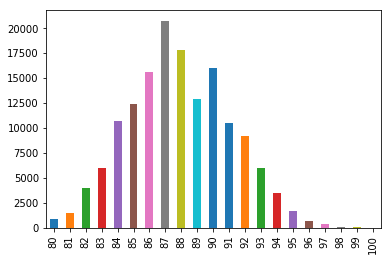

In [3]:
reviews['points'].value_counts().sort_index().plot.bar()

在本节中，我们将努力使这个情节看起来更好。

这个情节很难看。 所以把它做大！ 我们可以使用figsize参数来做到这一点。

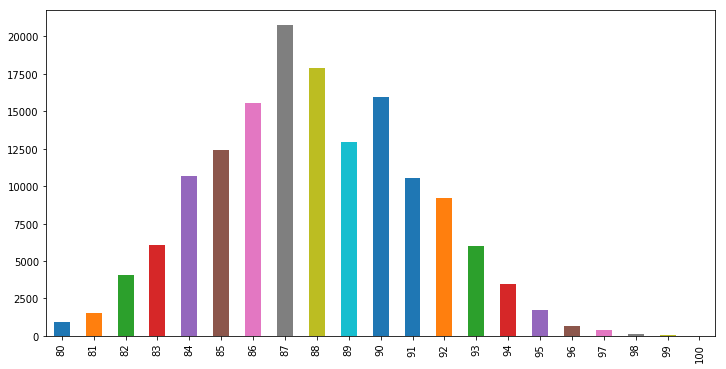

In [4]:
reviews['points'].value_counts().sort_index().plot.bar(figsize=(12, 6))

figsize控制图像的大小，以英寸为单位。 它期望一个（宽度，高度）值的元组。

接下来，我们可以使用color参数将条形的颜色更改为更主题。

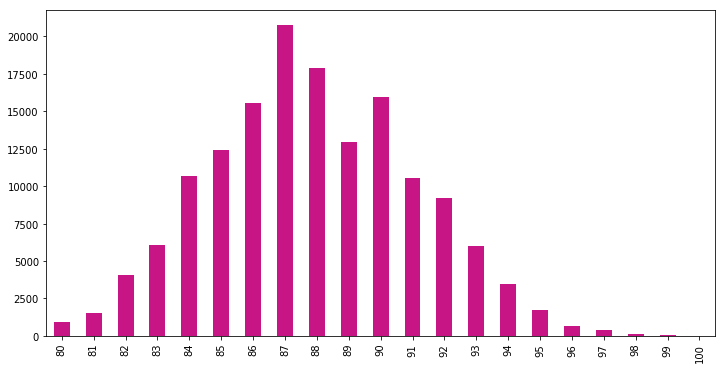

In [5]:
reviews['points'].value_counts().sort_index().plot.bar(figsize=(12, 6),color='mediumvioletred')

文字标签很难以这个尺寸阅读。 当我们的情节非常小时，它们符合情节，但现在情节要大得多，我们需要更大的标签。 我们可以使用fontsize来调整它。

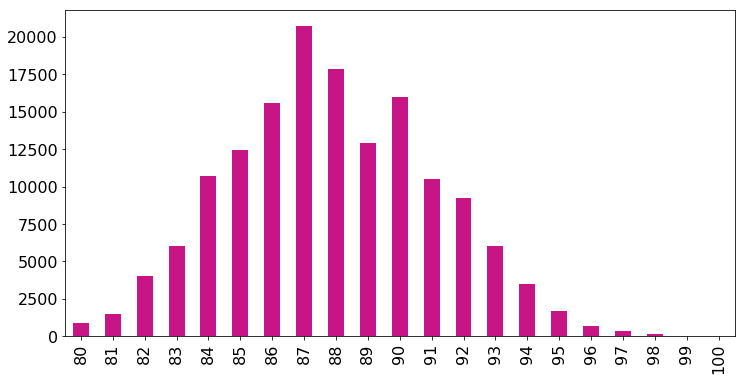

In [6]:
reviews['points'].value_counts().sort_index().plot.bar(
    figsize=(12, 6),
    color='mediumvioletred',
    fontsize=16
)

我们还需要一个头衔。

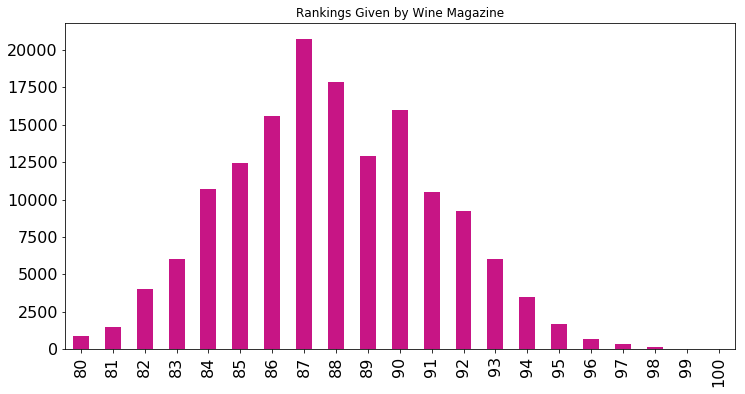

In [7]:
reviews['points'].value_counts().sort_index().plot.bar(
    figsize=(12, 6),
    color='mediumvioletred',
    fontsize=16,
    title='Rankings Given by Wine Magazine',
)

但是，这个标题太小了。 不幸的是，大熊猫并没有给我们一个简单的方法来调整标题大小。

在引擎盖下，pandas数据可视化工具构建在另一个名为matplotlib的低级图形库之上。 您在pandas中构建的任何内容都可以直接使用matplotlib构建。 大熊猫只是让你更容易完成这项工作。

matplotlib确实提供了一种调整标题大小的方法。 让我们继续这样做，看看有什么不同：

Text(0.5,1,'Rankings Given by Wine Magazine')

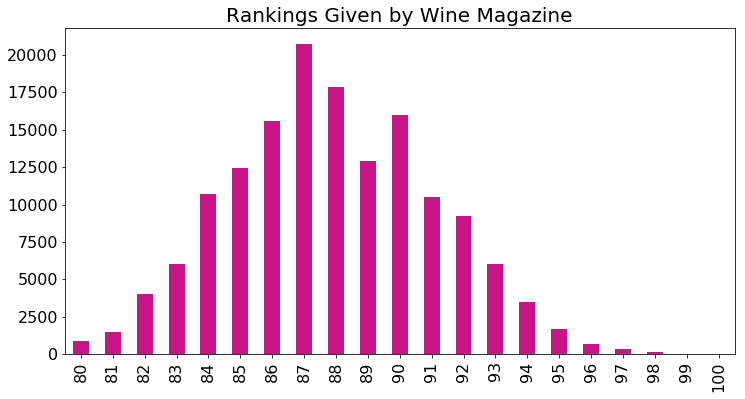

In [8]:
import matplotlib.pyplot as plt

ax = reviews['points'].value_counts().sort_index().plot.bar(
    figsize=(12, 6),
    color='mediumvioletred',
    fontsize=16
)

ax.set_title("Rankings Given by Wine Magazine", fontsize=20)

在上面的单元格中，我们所做的就是抓住该对象，将其分配给变量ax，然后在ax上调用set_title。 ax.set_title方法可以轻松更改fontsize; pandas库中的title = keyword参数没有。

seaborn，在本教程的单独部分中介绍，也使用了引擎盖下的matplotlib。 这意味着上面的技巧也在那里工作。 seaborn也有自己的技巧 - 例如，我们可以使用非常方便的sns.despine方法来关闭丑陋的黑色边框。

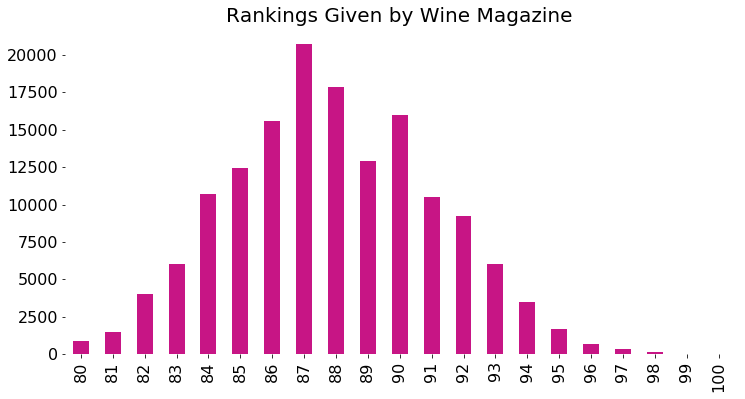

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

ax = reviews['points'].value_counts().sort_index().plot.bar(
    figsize=(12, 6),
    color='mediumvioletred',
    fontsize=16
)
ax.set_title("Rankings Given by Wine Magazine", fontsize=20)
sns.despine(bottom=True, left=True)

这个图比我们开始时更清晰; 它会更好地将分析传达给读者。

除了我们在这里展示的内容之外，你还可以做很多很多事情。 不同的图提供了不同的样式选项：例如，颜色几乎是通用的，而s（大小）仅在散点图中有意义。 目前，我们在这里展示的操作足以让您入门。

### Exercises

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pokemon = pd.read_csv("./input/pokemon.csv")
pokemon.head(3)

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0


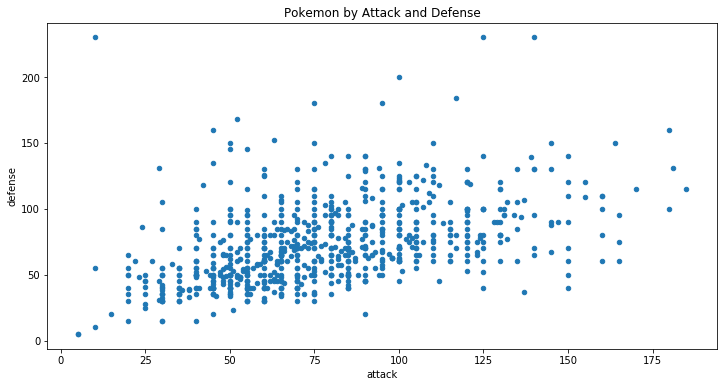

In [19]:
pokemon.plot.scatter(x='attack', y='defense',
                     title='Pokemon by Attack and Defense',
                     figsize=(12, 6) )

Text(0.5,1,'Pokemon by Stat Total')

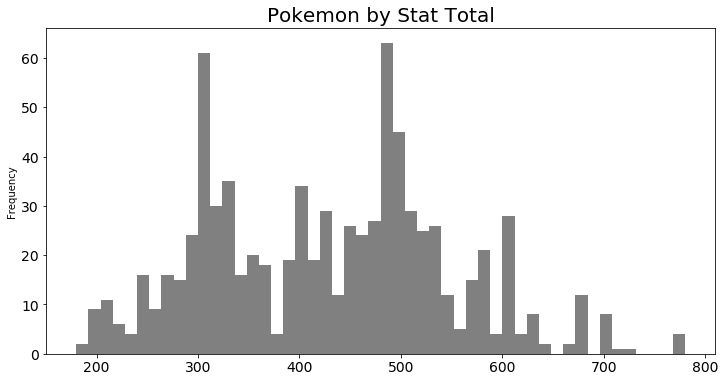

In [26]:
ax = pokemon['base_total'].plot.hist(
    figsize=(12, 6),
    fontsize=14,
    bins=50,
    color='gray'
)
ax.set_title('Pokemon by Stat Total', fontsize=20)

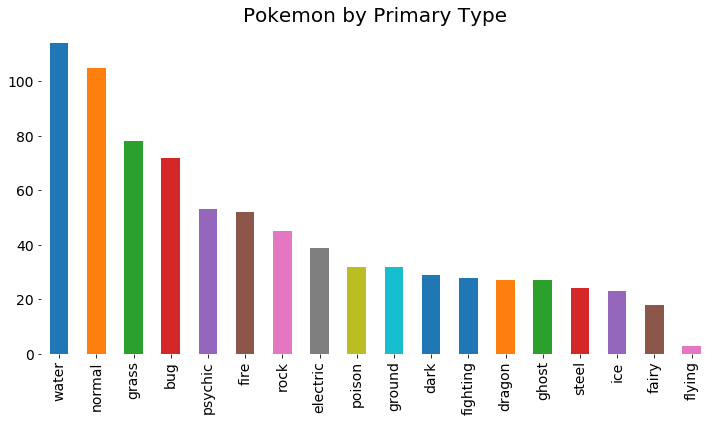

In [32]:
ax = pokemon['type1'].value_counts().plot.bar(
    figsize=(12, 6),
    fontsize=14
)
ax.set_title("Pokemon by Primary Type", fontsize=20)
sns.despine(bottom=True, left=True)

### Conclusion

在本教程的这一部分中，我们学习了一些简单的技巧，使我们的绘图更具视觉吸引力，因此更具沟通性。 我们还了解到还有另一个绘图库matplotlib，它位于熊猫数据可视化工具的“下方”，我们可以使用它来更精细地操作我们的绘图。